In [14]:
import numpy as np
import pandas as pd
import seaborn as sns 
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import random


## Ejercicio 1

Genere un conjunto de datos 
*   $f(x)=-2x^4+3x^2+1$
*   $x\sim Unif(0,1)$
*   $y=f(x) + \varepsilon$
*   $\varepsilon \sim \mathcal{N}(0,0.01)$

Realice un scatter plot y un ajuste lineal usando la covariable $x$ y un intercept.

In [150]:
random.seed(10)

In [151]:
e = np.random.normal(0,0.01,50)
x = np.random.default_rng().uniform(-1,1,50)
def f_x(x):
    return(-2*(x**4)+3*(x**2)+1)


In [152]:
y = f_x(x)+e
reg = LinearRegression().fit(np.array(x).reshape(-1,1),y)


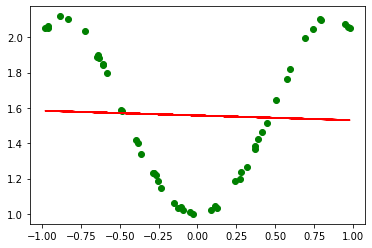

In [153]:
plt.plot(x,reg.predict(np.array(x).reshape(-1,1)),color='red')
plt.scatter(x,f_x(x)+e,color='green')
plt.show()

## Ejercicio 2

Agregue como predictores los atributos polinómicos $x^2$, $x^3$, $x^4 \dots$ de manera secuencial:
* repita el ajuste lineal para cada modelo,
* grafique los ajustes obtenidos,
* grafique el error cuadrático medio en un conjunto de test en función del conjunto de predictores utilizado.
* extra: repita el punto anterior calculando el error de validación cruzada.

**Sugerencia:** considere el comando `poly`.

Tengo que armar una regresion polinomica, la unica forma simple q veo es usando la libreria statsmodel y la api formula, necesito un df entonces creo uno con mi x e y

In [154]:
import statsmodels.formula.api as smf


In [155]:
df = pd.DataFrame(x,columns=["x"])
df["y"]= y
df.head()

,x,y
0,-0.642231,1.898927
1,0.742083,2.047457
2,0.389715,1.423689
3,-0.489334,1.588886
4,-0.235624,1.145064


Armo un bucle donde me crea las regresiones y los ajustes hasta grado 4

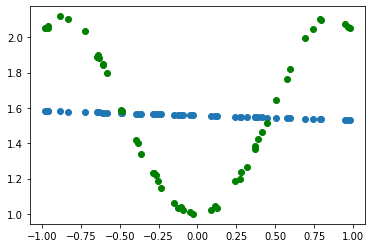

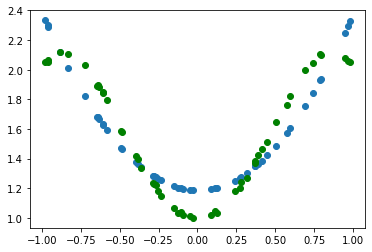

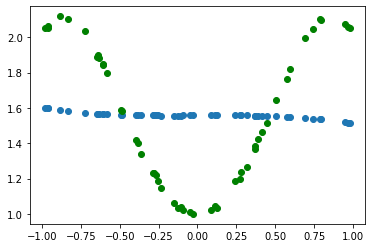

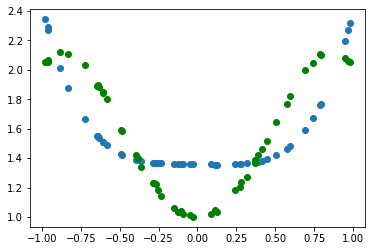

In [156]:
xx = np.linspace(-1,1,100)

### OJO de esta forma no tengo en cuenta los coeficientes anteriores, osea lo hace para x+ x^{h}
for h in [1,2,3,4]:
    model = 'y ~ x + I(x**h)'
    modelo_x2 = smf.ols(formula = model, data = df)
    res = modelo_x2.fit()
    plt.scatter(df["x"],res.predict(df["x"]))
#    plt.plot(xx,res.predict(xx.reshape(-1,1))) 
    plt.scatter(x,f_x(x)+e,color='green')
    plt.show()

### Usando sklearn la libreria preprocessing

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
poly = PolynomialFeatures(2)
X = poly.fit_transform(np.array(x).reshape(-1,1))
clf = LinearRegression().fit(X, y)


Para cada ajuste polinomico calculo el error cuadratico medio


Error cuadratico medio: 0.1564


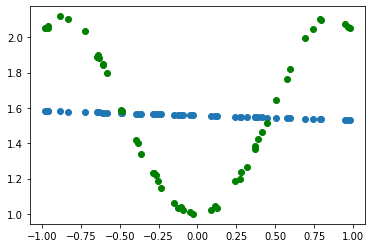

Error cuadratico medio: 0.0257


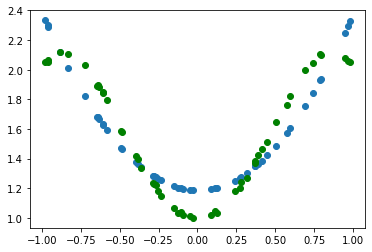

Error cuadratico medio: 0.0257


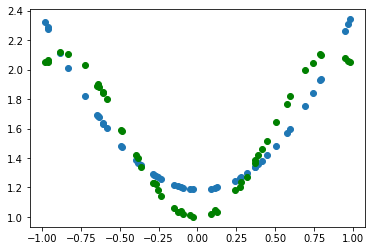

Error cuadratico medio: 0.0001


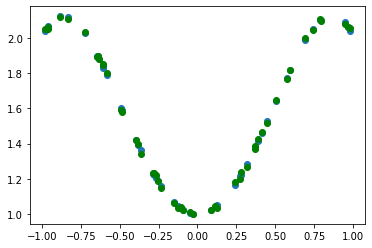

In [158]:
for h in [1,2,3,4]:
    poly = PolynomialFeatures(h)
    X = poly.fit_transform(np.array(x).reshape(-1,1))
    clf = LinearRegression().fit(X, y)
    print("Error cuadratico medio:",np.round(mean_squared_error(y, clf.predict(X)),4))
    plt.scatter(x,clf.predict(X))
    plt.scatter(x,f_x(x)+e,color='green')
    plt.show()
    

#### Usando validacion cruzada

In [159]:
# miro los tipos de error q se pueden calcular con la validacion cruzada usando sklearn
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [160]:
# uso neg_mean_squared_error_scorer que em este caso si el error es grande lo pone como malo

[0.12290677 0.18447024 0.18034916 0.14813428 0.20241492] 0.16765507450217038
[0.02896953 0.02296684 0.03758697 0.03739364 0.0230994 ] 0.03000327738992124
[0.02895084 0.02389452 0.03743265 0.03765828 0.02292116] 0.030171489895056337
[1.64665594e-04 8.31067497e-05 1.40907336e-04 1.16524695e-04
 1.55077354e-04] 0.00013205634546865113


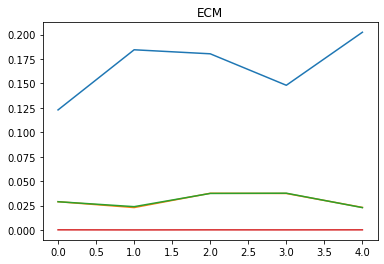

In [217]:
from sklearn.model_selection import cross_validate
for h in [1,2,3,4]:
    poly = PolynomialFeatures(h)
    X = poly.fit_transform(np.array(x).reshape(-1,1))
    clf = LinearRegression()
    scoring = ['neg_mean_squared_error']
    scores = cross_validate(clf, X, y, scoring=scoring,cv=5)
    print(scores["test_neg_mean_squared_error"]*(-1),np.mean(scores["test_neg_mean_squared_error"]*(-1)))
    plt.plot(scores["test_neg_mean_squared_error"]*(-1))
    plt.title("ECM")

## Ejercicio 3

Repita las regresiones anteriores con una penalidad *ridge* y *lasso*. 
Grafique el error cuadrático medio en un conjunto de test para distintos valores de penalización.

**Sugerencia:** considere el comando `glmnet` cambiando su parámetro `alpha` y `cv.glmnet` para hallar el parámetro de penalización por validación cruzada.

In [174]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV


### Ridge CV

### Estabilidad de coeficientes segun alfa

In [175]:
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )



In [181]:
ridge_model = modelo.fit(X = np.array(x).reshape(-1,1), y = y)


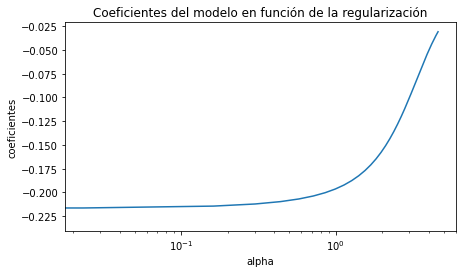

In [203]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(np.array(x).reshape(-1,1), y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(np.log(alphas), coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()


### ECM en funcion del alfa dado para un grado en particular de polinomio

#### Aca puedo fijar el grado del polinomio o bien usar todos los grados y promediar, osea primero el bucle por polinomio y el bucle mas grande por alfa

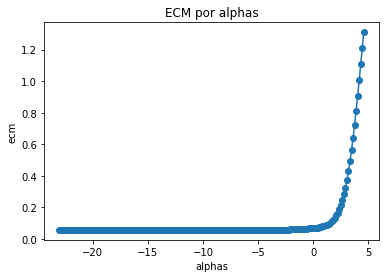

In [256]:
alphas = modelo.alphas
ecm_h=[]
from sklearn.model_selection import cross_validate

for alpha in alphas:

    
    ecm_mean_alpha = []

    for h in [1,2,3,4]:

        poly = PolynomialFeatures(h)
        X = poly.fit_transform(np.array(x).reshape(-1,1))
        clf = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
        scoring = ['neg_mean_squared_error']
        scores = cross_validate(clf, X, y, scoring=scoring,cv=5)
# para cada alfa tengo 5 fold y en cada uno un ecm, me guardo el promedio
        ecm_cv = np.mean(scores["test_neg_mean_squared_error"]*(-1))
        ecm_mean_alpha.append(ecm_cv)                 
# con el promedio para cada elemento de la grilla de  alfas (que son muchos) los promedio de acuerdo a su grado de poliniomio, entonces la salida final va a ser un fector de dim h
    prom = np.mean(ecm_mean_alpha)
    ecm_h.append(prom)


plt.scatter(np.log(alphas),ecm_h)
plt.plot(np.log(alphas),ecm_h)
plt.title("ECM por alphas")    
plt.xlabel("alphas")
plt.ylabel("ecm")
plt.show()    

In [248]:
len(ecm_h),len(alphas)

(200, 200)

### Evolucion ECM para un alfa dado y distintos ajustes polinomicos

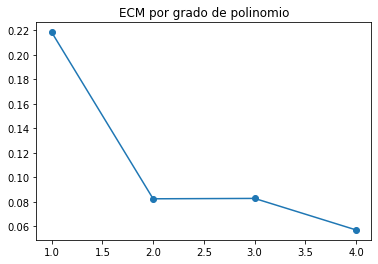

In [243]:
alphas = modelo.alphas
ecm_h=[]
from sklearn.model_selection import cross_validate

for h in [1,2,3,4]:

    ecm_mean_alpha = []

    for alpha in alphas:
        poly = PolynomialFeatures(h)
        X = poly.fit_transform(np.array(x).reshape(-1,1))
        clf = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
        scoring = ['neg_mean_squared_error']
        scores = cross_validate(clf, X, y, scoring=scoring,cv=5)
# para cada alfa tengo 5 fold y en cada uno un ecm, me guardo el promedio
        ecm_cv = np.mean(scores["test_neg_mean_squared_error"]*(-1))
        ecm_mean_alpha.append(ecm_cv)                 
# con el promedio para cada elemento de la grilla de  alfas (que son muchos) los promedio de acuerdo a su grado de poliniomio, entonces la salida final va a ser un fector de dim h
    prom = np.mean(ecm_mean_alpha)
    ecm_h.append(prom)

plt.scatter([1,2,3,4],ecm_h)
plt.plot([1,2,3,4],ecm_h)
plt.title("ECM por grado de polinomio")    
plt.show()

### Lasso CV

#### Aca si la regresion fuera multiple podria haber coeficientes que tiendan a cero, hace seleccion de variables

In [211]:
# de aca saco los alphas
modelo_l = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
modelo_lasso = modelo.fit(X = np.array(x).reshape(-1,1), y = y)


Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

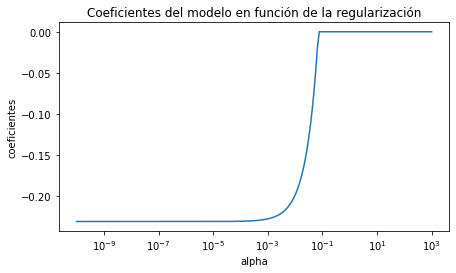

In [210]:
alphas = modelo_l.alphas
coefs = []
for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(np.array(x).reshape(-1,1), y)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')

### Haciendo una validacion cruzada por cada ajuste polinomico

In [194]:
alpha=np.mean(alphas)

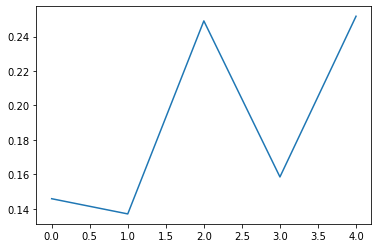

[0.1458722  0.13704528 0.24912224 0.15851744 0.25182663] 0.18847675705720218


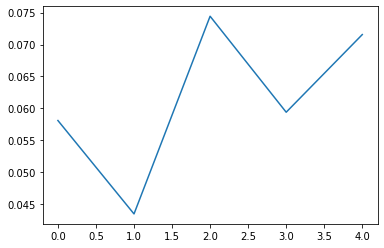

[0.05809414 0.04346683 0.07442637 0.0593957  0.07155521] 0.06138765182106234


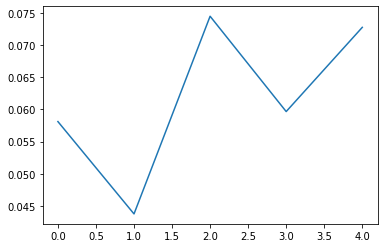

[0.05811677 0.04376438 0.07449186 0.0596759  0.07276513] 0.061762808393997184


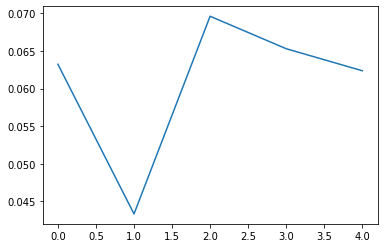

[0.06321961 0.04333695 0.06960375 0.06528853 0.06236095] 0.06076195588411878


In [201]:
for h in [1,2,3,4]:
    poly = PolynomialFeatures(h)
    X = poly.fit_transform(np.array(x).reshape(-1,1))
#    clf = LinearRegression()
    clf = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    scoring = ['neg_mean_squared_error']
    scores = cross_validate(clf, X, y, scoring=scoring,cv=5)
    plt.plot(scores["test_neg_mean_squared_error"]*(-1))
    plt.show()
    print(scores["test_neg_mean_squared_error"]*(-1),np.mean(scores["test_neg_mean_squared_error"]*(-1)))

array([0.06321961, 0.04333695, 0.06960375, 0.06528853, 0.06236095])

In [ ]:
for h in [1,2,3,4]:
    for alpha in alphas:
        poly = PolynomialFeatures(h)
        X = poly.fit_transform(np.array(x).reshape(-1,1))
    #    clf = LinearRegression()
        clf = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
        scoring = ['neg_mean_squared_error']
        scores = cross_validate(clf, X, y, scoring=scoring,cv=5)
        plt.plot(scores["test_neg_mean_squared_error"]*(-1))
        plt.show()
        print(scores["test_neg_mean_squared_error"]*(-1),np.mean(scores["test_neg_mean_squared_error"]*(-1)))